In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSet/spam.tsv",sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df['label'].value_counts()*100/len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [ ]:
#this describe() will apply the statistics only on the numeric column only in the dataset
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df_ham=df[df['label']=='ham']
print(df_ham.shape)

df_spam=df[df['label']=='spam']
print(df_spam.shape)

(4825, 4)
(747, 4)


In [ ]:
df_ham=df_ham.sample(df_spam.shape[0])
df_ham.shape,df_spam.shape

((747, 4), (747, 4))

In [ ]:
data=df_ham.append(df_spam,ignore_index=True)
print(data.shape)
data['label'].value_counts()

(1494, 4)


<ipython-input-10-ebf02c5dffc2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df_ham.append(df_spam,ignore_index=True)


ham     747
spam    747
Name: label, dtype: int64

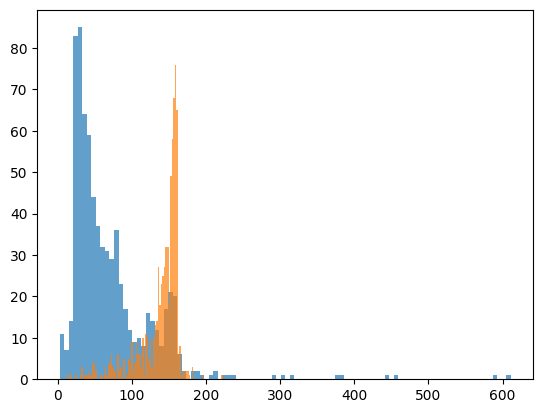

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

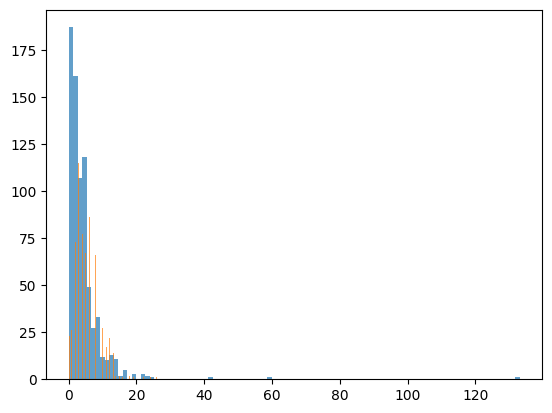

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['message'],data['label'],test_size=0.3,shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((1045,), (449,))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=100))
])

classifier.fit(X_train, Y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

accuracy_score(Y_test,y_pred)

0.9532293986636972

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[222,   2],
       [ 19, 206]])

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       224
        spam       0.99      0.92      0.95       225

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



**SVM**

In [ ]:
from sklearn.svm import SVC

svm = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", SVC(C=100,gamma='auto'))
])

svm.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred=svm.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       224
        spam       0.98      0.92      0.94       225

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [ ]:
accuracy_score(Y_test,y_pred)


0.9465478841870824

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[219,   5],
       [ 19, 206]])